## COMP3670/6670 Programming Assignment 2 - Clustering, Linear Regression and Gradient Descent
---

**Enter Your Student ID: u7305725**

**Your Name: Zhishang Bian**
    
**Deadline: 9/19/2022 0:30am** 

**Submit:** Write your answers in this file, and submit a single Jupyter Notebook file (.ipynb) on Wattle. Rename this file with your student number as 'uXXXXXXX.ipynb'. Note: you don't need to submit the .png or .npy files. 

**Enter Discussion Partner IDs Below:**
You could add more IDs with the same markdown format above.

**Programming Section**:
- Task 1.1 - 1.3: 30%
- Task 1.4: 40%
- Task 2: 30%

In [1]:
import time
import sys
! pip install numpy
import numpy as np
! pip install matplotlib
import matplotlib.pyplot as plt
import math
import os
from matplotlib.pyplot import imread
! pip install patchify
from patchify import patchify

np.random.seed(1)


## Task1: Clustering and Bag of Visual Words
-----------
These programming exercises will focus on K-means clustering. 

If you're unsure of how k-means works, read this very helpful and freely available online breakdown from Stanford's CS221 course; https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

This assignment requires you to loosely interpret how k-means is a specific case of a more general algorithm named Expectation Maximisation. This is explained toward the end of the above article.

First, lets loading the dataset.

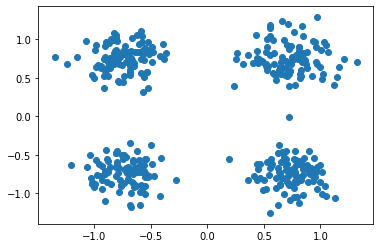

In [2]:
X = np.load("./data_clustering.npy")
plt.scatter(X[:,0], X[:,1])
plt.show()

K-means is a special, simple case of the Expectation Maximisation (EM) algorithm.

This simplified EM (k-means), is divided into two steps.

The **E-Step**, where for every sample in your dataset you find which "centroid" that datapoint is closest to that sample, and record that information.

The **M-Step**, where you move each "centroid" to the center of the samples which were found to be closest to it in the **E-Step**.

Each *centroid* is simply an estimated mean of a cluster. If you have $1$ centroid, then this centroid will become the mean of all your data.

Centroids are initially random values, and the k-means algorithm attempts to modify them so that each one represents the center of a cluster.

We have implemented a centroids initialization function.

In [3]:
def initialise_parameters(m, X):
    C = X[np.random.choice(X.shape[0], m)]
    return C

C = initialise_parameters(4, X)
print(C)

[[ 0.55638768  1.19083041]
 [ 0.99468733 -0.63105385]
 [-0.80861347 -0.47487527]
 [ 0.83443335  0.7038998 ]]


Now let's implement K-Means algorithm.

---
   **TASK 1.1:** Create a function $E\_step(C, X) = L$, where $L$ is a matrix of the same dimension of the dataset $X$.
   
   This function is is the **E-Step** (or "assignment step") mentioned earlier.

---

**HINT:** 
- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
- https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm
- Each row of $L$ is a centroid taken from $C$.

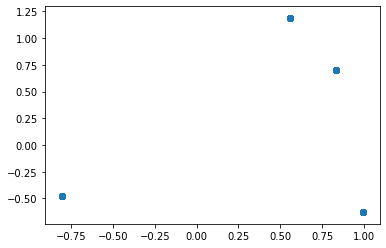

In [4]:
def distance(centre,sample):
    return(math.sqrt(np.sum((centre-sample)**2)))
#     return(math.sqrt((centre[0]-sample[0])**2+(centre[1]-sample[1])**2))
def E_step(C, X):
    m, n = X.shape
    L = np.zeros((m,n))
    # YOUR CODE HERE
    for i,sample in enumerate(X):
        mindist = 10000
        for c in C:
            dist = distance(c,sample)
            if(dist<mindist):
                mindist = dist
                L[i] = c
    return L
    
L = E_step(C, X)
plt.scatter(L[:, 0], L[:, 1])
plt.show()

**TASK 1.2:** Create a function $M\_step(C, X, L) = C$ which returns $C$ modified so that each centroid in $C$ is placed in the middle of the samples assigned to it. This is the **M-Step**.

In other words, make each centroid in $C$ the average of all the samples which were found to be closest to it during the **E-step**. This is also called the "update step" for K-means.

---

**HINT:** https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html

In [5]:
def M_step(C, X, L):
    # YOUR CODE HERE
    m, n = C.shape
    newC = np.zeros((m,n))
    for n,c in enumerate(C):
        arrsum = np.zeros((1,X.shape[1]))
        quantity = 0
        for i,j in enumerate(L):
            if(np.all(j == c)):
                arrsum = arrsum + X[i]
                quantity += 1
        if(quantity != 0):
            newC[n] = arrsum/quantity
        else:
            print("no")
    return newC


print('Before:')
print(C)
print('\nAfter:')
new_C = M_step(C, X, L)
print(new_C)

Before:
[[ 0.55638768  1.19083041]
 [ 0.99468733 -0.63105385]
 [-0.80861347 -0.47487527]
 [ 0.83443335  0.7038998 ]]

After:
[[-0.18550673  0.94593855]
 [ 0.74859936 -0.74619961]
 [-0.76830416 -0.16807746]
 [ 0.75645564  0.69249107]]


**TASK 1.3:** Implement $kmeans(X, m, threshold) = C, L$ which takes a dataset $X$ (of any dimension) and a scalar value $m$ and a scalar $threshold$ as input. This function uses the 3 functions you wrote previously to:
- generate $m$ centroids.
- iterate between the E and M steps until the difference of loss values between two iterations is less than the threshold to classify the $m$ clusters.

...and then returns:
- $C$, the centers of the $m$ clusters after convergence.
- $L$, the labels (centroid vectors) assigned to each sample in the dataset after convergence.
---
**HINT:** Using initialise_parameters to initial centroid

Initial Parameters:
[[-0.74965351  0.7531092 ]
 [ 0.74859936 -0.74619961]
 [-0.73312486 -0.73655558]
 [ 0.72539561  0.75302836]]

Final Parameters:
[[-0.74965351  0.7531092 ]
 [ 0.74859936 -0.74619961]
 [-0.73312486 -0.73655558]
 [ 0.72539561  0.75302836]]


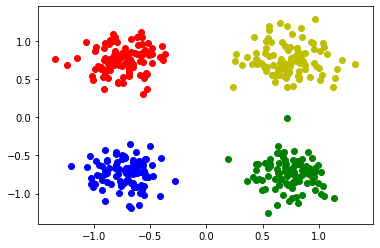

In [6]:
def kmeans(X, m, threshold):
    # YOUR CODE HERE
    global C
    L = E_step(C,X)
    newC = M_step(C,X,L)
    for i in range(C.shape[0]):
        if(distance(C[i],newC[i])<threshold):
            return newC,L
        else:
            C = newC
            return kmeans(X,m,threshold)


#CODE TO DISPLAY YOUR RESULTS. DO NOT MODIFY.
C_final, L_final = kmeans(X, 4, 1e-6)
print('Initial Parameters:')
print(C)
print('\nFinal Parameters:')
print(C_final)
def allocator(X, L, c):
    cluster = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
    return np.asarray(cluster)

colours = ['r', 'g', 'b', 'y']
for i in range(4):
    cluster = allocator(X, L_final, C_final[i, :])
    plt.scatter(cluster[:,0], cluster[:,1], c=colours[i])
plt.show()


Your answer should like this, maybe with different colors:
![image](./cluster.png)

**TASK 1.4:** Implement Bag of Visual Words (BOVW) to perform pedestrian retrieval. See more information at:

https://en.wikipedia.org/wiki/Bag-of-words_model

https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision

First, let's understand the settings of datasets.

---
We provide you with 3 pedestrian image folders, 'train', 'gallery', and 'val_query'. There are 99 images in 'train' which are used to create a vocabulary through clustering. 'Gallery' contains 90 images which belong to 15 different pedestrians. If two images' file name have same first four digits, then these two images belong to same pedestrian. When we randomly select a query image from 'val_query', we aim to find the images from the 'gallery' that contain the same person as the query. Let's load the images in 'train' and visualise an example.

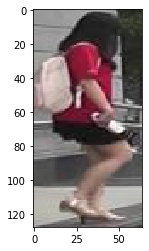

In [7]:
train_images = []
for file in os.listdir("./train"):
    if file.endswith(".jpg"):
        im = imread("./train/" + file)
        train_images.append(im)
        assert im.shape == (128, 64, 3)
plt.imshow(train_images[0])
plt.show()

To generate the vocabulary, the first step is computing local image features. For simplicity, patches of size 8×8 are densely sampled, and we use these patches for local feature extraction. The sampling step is 8, so there is no overlapping between patches. 

Before splitting, the image size is (128, 64, 3)
After splitting, the patches are (128, 8, 8, 3)
A patch is like:


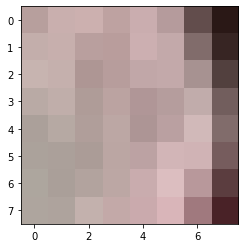

In [8]:
def patchify_images(image):
    return patchify(image, (8, 8, 3), step=8).reshape((-1, 8, 8, 3))

patches = patchify_images(train_images[0])
print(f'Before splitting, the image size is {train_images[0].shape}')
print(f'After splitting, the patches are {patches.shape}')
print('A patch is like:')
plt.imshow(patches[50])
plt.show()

Then you need to implement your feature extractor to compute the feature of an image patch. Complete the function

$$compute\_patch\_feature(patch) = patch\_feature$$

**Requirements:** 
- You are not allowed to import any other packages except Numpy and Scipy. (Your are allowed to import packages in Numpy or Scipy, such as scipy.signal). 
- You can find inspiration from internet. However, you have to code by yourself. Hint: color feature might be a useful option.
- Your implementation for feature extraction of a patch should be of reasonable speed, e.g., within a second. You will have 0 if your algorithm takes too much time to run.

In [9]:
def compute_patch_feature(patch):
    #YOUR CODE HERE
    Red,Green,Blue = patch[:,:,0],patch[:,:,1],patch[:,:,2]
    meanRed = np.mean(Red)
    meanGreen = np.mean(Green)
    meanBlue = np.mean(Blue)
    return np.array([meanRed,meanGreen,meanBlue])

start = time.time()
print(f'The shape of the feature of a patch is :{compute_patch_feature(patches[50]).shape} in my implementation.')
end = time.time()
print(f'It takes {end-start} seconds to compute the feature for one image patch.')

The shape of the feature of a patch is :(3,) in my implementation.
It takes 0.0 seconds to compute the feature for one image patch.


Now, you can create the vocabulary from patch features in the 'train' folder. Complete the function

$$create\_vocabulary(train\_images) = vocabulary$$

**HINT:** 
- Remember to call the functions you defined in Task 1.1, 1.2 and 1.3.
- You are free to decide the size of vocabulary as long as it can be generated within 2 minutes.
- It is NOT allowed to use 'gallary' or 'val_query' images for vocabulary training. You will have 0 for Task 1.4 if you use them.
- It is NOT allowed to use external images (e.g., those from the web), either. 

In [10]:
def kmeans1(X,C, m, threshold):
    print("running" , end=" ")
    L = E_step(C,X)
    newC = M_step(C,X,L)
    for i in range(C.shape[0]):
        if(distance(C[i],newC[i])<threshold):
            return newC,L
        else:
            C = newC
            return kmeans1(X,C,m,threshold)
        
def create_vocabulary(train_images):
    #YOUR CODE HERE
    imagefeature = []
    for num,images in enumerate(train_images):
        patches = patchify_images(images)
        for patch in patches:
            imagefeature.append(compute_patch_feature(patch))
    imagefeature = np.array(imagefeature)
    C = initialise_parameters(15, imagefeature)
    C_final = C # this is essential, so that C won't be change after iteration
    C_final, L_final = kmeans1(imagefeature,C, 15, 1e-6)
    print(C_final)
    return(C_final)


start = time.time()
vocabulary = create_vocabulary(train_images)
end = time.time()
print(f'The shape of my vocabulary is {vocabulary.shape}.')
print(f'It takes {end-start} seconds to generate the vocabulary.' )

running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running running [[136.58897779 132.98552334 131.71432605]
 [ 36.35633181  34.50125982  35.18098822]
 [ 82.83398068  76.37147082  74.94143336]
 [100.76902847  95.16820763  94.7133354 ]
 [212.82529762 214.16465774 217.44732143]
 [ 35.32371549  98.26552914  97.40327837]
 [178.43539916 158.85543592  63.08534664]
 [153.69103334 150.36963651 150.51525474]
 [136.6457556   38.53509795  51.04652519]
 [ 59.18941604  56.90927858  56.98603145]
 [ 57.08151355 142.59563253 202.51995482]
 [121.29872362 115.33982053 114.17892576]
 [166.3924518  137.43769434 122.30107276]
 [178.99857058 173.21682768 171.53396096]
 [128.23315055 100.925921    87.72330175]]
The shape of my vocabular

You have built the vocabulary successfully. You must know how to compute the feature representation of an image. Now, let's do a simple pedestrian retrieval task where we are going to pick a query image from 'val_query' and try to search for images in 'gallery' which contain the same person. 

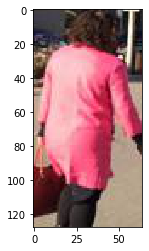

In [11]:
gallery_images = []
gallery_filenames = []
for file in os.listdir("./gallery"):
    if file.endswith(".jpg"):
        im = imread("./gallery/" + file)
        gallery_images.append(im)
        gallery_filenames.append(file)

query_image = imread("./val_query/0001_c5_0022.jpg")
# show a query image
plt.imshow(query_image)
plt.show()

Complete the function
   
$$image\_similarity\_ranking(gallery\_images, query\_image, vocabulary, gallery\_filenames) = list\_of\_name\_of\_the\_gallery\_images$$

gallery_images is the collection of all 90 images with dimension $90 \times 128 \times 64 \times 3$.

query_image is one image with dimension $128 \times 64 \times 3$.

The return value should be a list of image file names. Each name indicates a gallery image, ranked according to their similarities with the query. That is, the first file name corresponds to the image with the highest similarity to the query. The second file name in the list is image with second highest similarity to the query, etc. A file name should be '0001_c5_0022.jpg'. The length of the result should be 90, same as the number of gallery images. **For Task 1.4, you will be marked based on the retrieval accuracy**.  


**Requirements:** 
- You can't use the filename to do the task trivially. In other words, you must use a machine learning solution.
- You are free to improve the distance metric (an $\ell_2$ distance is a basic option).
- You need to extract the feature of an image by the BOVW method. Other options (e.g., deep learning) are not allowed.
- Your implementation (e.g., BOVW feature extraction for an image, nearest neighbor search) should be of reasonable speed, e.g., within 20 seconds. You will receive 0 if your algorithm takes too much time to run (e.g., more than 2 minutes).

Marking criteria: Our evaluation process will calculate a matching score, a weighted sum of your top-1, 2, 3, 4, 5 accuracy using some test queries (not provided to students). These test queries will be used to probe your gallery data (90 images). Top-k accuracy measures the percentage of queries for which you could find the true match within the top-k position of the rank list. Your mark will be given based on your accuracy. For example, if your accuracy is within top 10% in the class, you will receive 40 marks; If your accuracy is 50% in the class, you will get 20 marks. If your program contains errors/bugs, you will receive 0. 

In [96]:
L.shape[0]

400

['0001_c5_0023.jpg', '0001_c5_0024.jpg', '0001_c5_0025.jpg', '0025_c5_0012.jpg', '0001_c5_0024.jpg']
It takes 3.8701112270355225 seconds to get the matching results of a query
Your query image is:


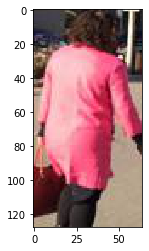

The best matching is:


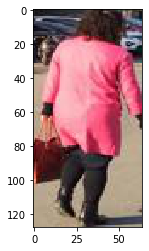

In [128]:
def most_frequent(arr):
    maxcount = 0
    element_having_max_freq = 0
    element_having_second_freq = 0
    for i in range(0, arr.shape[0]):
        count = 0
        for j in range(0, arr.shape[0]):
            if(np.all(arr[i] == arr[j])):
                count += 1
        if(count > maxcount):
            maxcount = count
            element_having_second_freq = element_having_max_freq
            element_having_max_freq = arr[i]
    return element_having_max_freq,element_having_second_freq

def image_to_centre(query_image,vocabulary):
    patches = patchify_images(query_image)
    queryfeature = []
    for patch in patches:
        queryfeature.append(compute_patch_feature(patch))
    queryfeature = np.array(queryfeature) # my dataset
    queryL = E_step(vocabulary,queryfeature)
    firstL,secondL = most_frequent(queryL)
    return firstL,secondL
  
def image_similarity_ranking(gallery_images, query_image, vocabulary, gallery_filenames):
    #YOUR CODE HERE
    indice = []
    result = []
    result2 = []
    firstL,secondL = image_to_centre(query_image,vocabulary) 
    for index,images in enumerate(gallery_images):
        firstLnew,secondLnew = image_to_centre(images,vocabulary)
        if(np.all(firstLnew == firstL)):
            result.append(gallery_filenames[index])
        if(np.all(secondLnew == secondL)):
            result2.append(gallery_filenames[index])
    result = result + result2
    print(result[:5])
    return result[:5]
# visualise your query image and its best match in gallery. Ideally, they should be the same person.
start = time.time()
name_list = image_similarity_ranking(gallery_images, imread("./val_query/0001_c5_0022.jpg"), vocabulary,gallery_filenames)
end = time.time()
print(f'It takes {end-start} seconds to get the matching results of a query')
print('Your query image is:')
plt.imshow(imread("./val_query/0001_c5_0022.jpg"))
plt.show()
print('The best matching is:')
plt.imshow(gallery_images[gallery_filenames.index(name_list[0])])
plt.show()
# We have 3 query images, you can try other two queries to see whether your algorithm performs well.

Please use the following code to calculate the matching score of 'val_query' dataset. Make sure the score is reasonble to you. We will be evaluating your implementation using some test queries that are not provided to you.

In [129]:
def match_score(name, name_list):
    def reid(idx):
        return name_list[idx][:4]

    base = 0.0
    code = name[:4]
    if reid(0) == code or reid(1) == code or reid(2) == code:
        base += 0.4
        if (reid(0) == code):
            base += 0.3
        elif (reid(1) == code):
            base += 0.2
        elif (reid(2) == code):
            base += 0.1
        if (reid(0) == code and reid(1) == code) or (reid(0) == code and reid(2) == code) or (
                reid(1) == code and reid(2) == code):
            base += 0.2
            if (reid(0) == code and reid(1) == code and reid(2) == code):
                base += 0.1
    else:
        if (reid(3) == code):
            base += 0.4
        elif (reid(4) == code):
            base += 0.2
    return base

def total_score():
    score = 0
    for file in os.listdir("./val_query"):
        name_list = image_similarity_ranking(gallery_images, imread("./val_query/" + file), vocabulary, gallery_filenames)
        score += match_score(file, name_list)
    return score

print(total_score())

['0001_c5_0023.jpg', '0001_c5_0024.jpg', '0001_c5_0025.jpg', '0025_c5_0012.jpg', '0001_c5_0024.jpg']
['0001_c5_0023.jpg', '0001_c5_0024.jpg', '0001_c5_0025.jpg', '0025_c5_0012.jpg', '0001_c5_0024.jpg']
['0006_c14_0019.jpg', '0006_c14_0020.jpg', '0006_c14_0022.jpg', '0006_c14_0024.jpg', '0003_c5_0015.jpg']
1.9999999999999998


## Task 2: Linear Regression and Gradient Descent
---

For exercise 2, we're going to implement multiple target **batch** linear regression with mean squared loss,

$$\mathcal{L} = \frac{1}{2 m} \sum_{i = 0}^{m} \mid \mid x_i\theta - y_i \mid \mid^2$$.

For the following questions:
- $x \in \mathbb{R}^{m}$ is the vector directly representing input features from the provided dataset. Every element of it is a single training example.
- $X \in \mathbb{R}^{m \times n}$ is the constructed feature matrix (e.g. polynomial features) used for learning. Each row of $X$ is a single training example.
- $\theta$ is our parameters. 
- $y \in \mathbb{R}^{m}$ is a matrix of the target values we're trying to estimate for each row of $X$. Each row $i$ of $X$ corresponds to row $i$ of $Y$.
- $m$ is the number of training examples.
- $n$ is the dimensionality of one training example.

Typically when people think of linear regression, they think of a mapping from $\mathbb{R}^n \rightarrow \mathbb{R}$, where they're trying to predict a single scalar value.

---
First, we load the data.

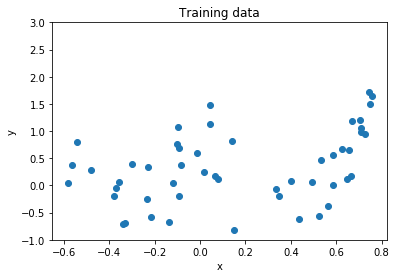

In [2]:
x_train, _, y_train, _ = np.load("./data_regression.npy")
plt.plot(x_train,y_train,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training data")
plt.ylim([-1,3])
plt.show()

It is obvious that it is not a good idea to perform linear regression directly on the input feature `x`. We need to add polynomial features. Lets construct an appropriate feature vector.

---
**Task 2.1**:  Complete the `get_polynomial_features` function with the following specifications.
* Input1: an array `x` of shape $(m,1)$.
* Input2: `degree` of the polynomial (integer greater than or equal to one).
* Output: matrix of shape $(m,degree+1)$ consisting of horizontally concatenated polynomial terms.
* Output: the first column of output matrix should be all ones.
---

In [3]:
def get_polynomial_features(x,degree=5):
    
    # YOUR CODE HERE
    result = np.zeros((x.shape[0],degree+1))
    result[:,0] = 1
    for r in range(len(x)): # each x_train
        for c in range(degree+1): # polynomial x^0, x^1, x^2
            result[r][c] = x[r]**c
    return result


# get polynomial features
X_train = get_polynomial_features(x_train,degree=2)

Let us implement gradient descent to find the optimal $\theta$.


---
**TASK 2.2:** Write a function $initialise\_parameters(n) = \theta$, where $\theta$ is the parameters we will use for linear regression $X\theta = Y$ for $X \in \mathbb{R}^{m \times n}, Y \in \mathbb{R}^{m}$.

The values of $\theta$ should be randomly generated. You will be judged on whether the matrix $\theta$ is correctly constructed for this problem.


---

**HINT:** $\theta$ should be an array of length $n$.

In [21]:
import random
def initialise_parameters(n):
    # YOUR CODE HERE
    paras = []
    for i in range(n):
        paras.append(random.random())
    result = np.array(paras)
    return result
    
# initialize theta
theta = initialise_parameters(X_train.shape[1])
print(theta)

[0.9653316  0.23854639 0.92161085]


---
**TASK 2.3:** Implement a function $ms\_error(X, \theta, y) = err$, which gives the **mean** squared error over all $m$ training examples.

---

In [7]:
def ms_error(X, theta, y): # y =X*theta
    # YOUR CODE HERE
    # 1/N*(y-X*theta)T*(y-X*theta)
    return((1/(X.shape[0]))* (y-X@theta)@(y-X@theta)) #Loss function, Linear regression slides 46 
    

print(ms_error(X_train, theta, y_train))

0.36996612609884183


---

**TASK 2.4:** Implement $grad(X, \theta, Y) = g$, a function that returns the average gradient ($\partial \mathcal{L}/\partial {\theta}$) across all the training examples $x_i \in \mathbb{R}^{1 \times n}$.

---

**HINT:** 
- The gradient should be an array with same length as $\theta$.
- https://www.sharpsightlabs.com/blog/numpy-sum/
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html

In [20]:
def grad(X, theta, Y):
    # YOUR CODE HERE
    #1/N * (-2yTx + 2*thetaT@xT@X)
    return(1/X.shape[0]*(-2*(Y@X)+2*((theta.transpose()@X.transpose()@X))))
    

print(grad(X_train, theta, y_train))

[-0.24180683 -0.07049055 -0.10125061]


---

**TASK 2.5:** Implement $batch\_descent(X, Y, iterations, learning\_rate) = \theta, L$, a function which implements batch gradient descent returning $\theta$ (parameters which estimate $Y$ from $X$), and $L$.

$iterations$ is the number of gradient descent iterations to be performed.

$learning\_rate$ is, of course, the learning rate.

$L$ is a matrix recording the mean squared error at every iteration of gradient descent. It will be an array of length $iterations$.

You should use the functions you completed earlier to complete this. 

---

**HINT:** 
- Remember, the point of gradient descent is to minimise the loss function. 
- It does this by taking "steps". The gradient always points in the steepest direction uphill, so by stepping in the opposite direction of the gradient we move toward the value of $\theta$ that minimises the loss function.

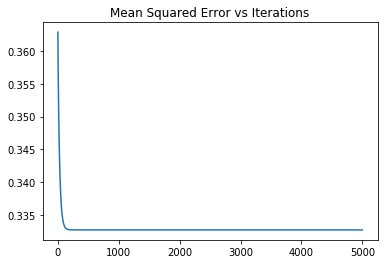

New Theta: 
 [0.05114354 0.21124046 1.20944543]

Final Mean Squared Error: 
 0.3327075839672673


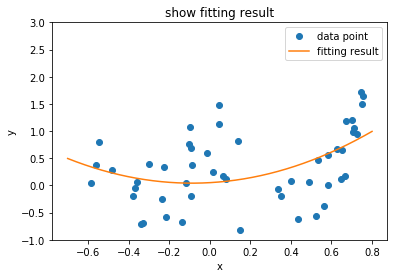

In [26]:
def batch_descent(X, Y, iterations, learning_rate):
    # YOUR CODE HERE
    theta = initialise_parameters(X.shape[1])
    L = []
    while(iterations!=0):
        theta = theta - learning_rate * grad(X,theta,Y)
        error =  ms_error(X, theta, Y)
        L.append(error)
        iterations-=1
    return theta,L

    
#REPORTING CODE. YOU MAY NEED TO MODIFY THE LEARNING RATE OR NUMBER OF ITERATIONS
new_theta, L = batch_descent(X_train, y_train, 5000, 0.5)
plt.plot(L)
plt.title('Mean Squared Error vs Iterations')
plt.show()
print('New Theta: \n', new_theta)
print('\nFinal Mean Squared Error: \n', ms_error(X_train, new_theta, y_train))

def get_prediction(X,theta):
    pred = X@theta
    return pred

x_fit = np.linspace(-0.7, 0.8, 1000)
X_fit = get_polynomial_features(x_fit,degree=2)
pred_y_train = get_prediction(X_fit,new_theta)

# plot results
plt.plot(x_train,y_train,'o',label='data point')
plt.plot(x_fit,pred_y_train,label='fitting result')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('show fitting result')
plt.ylim([-1,3])
plt.show()